In [1]:
import mysql.connector

# Step 1: Establish the database connection
def create_connection():
    try:
        connection = mysql.connector.connect(
            host="localhost",       
            user="root",  
            password="15112002", 
            database="ecommerce_data" 
        )
        print("Database connection established.")
        return connection
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        return None

# Create a connection
db_connection = create_connection()


Database connection established.


In [3]:
import pandas as pd
def fetch_data(connection):
    # Create a cursor object to execute SQL queries
    cursor = connection.cursor()

    # Query data from the 'customer' table
    cursor.execute('SELECT * FROM customer')
    customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

    # Query data from the 'product' table
    cursor.execute('SELECT * FROM product')
    product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

    # Query data from the 'order_details' table
    cursor.execute('SELECT * FROM order_details')
    order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

    # Close the cursor
    cursor.close()

    return customer_data, product_data, order_data

# Create a connection
db_connection = create_connection()

if db_connection:
    # Fetch data if the connection is successful
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Print the first 5 records from each table
    print("Customer Data:")
    print(customer_data.head())
    print("\nProduct Data:")
    print(product_data.head())
    print("\nOrder Data:")
    print(order_data.head())

    # Close the database connection
    db_connection.close()

Database connection established.
Customer Data:
  customer_id           name         city                email    phone_no  \
0        C001  Alice Johnson     New York    alice@example.com  1234567890   
1        C002      Bob Smith  Los Angeles      bob@example.com  2345678901   
2        C003  Charlie Brown      Chicago  charlie@example.com  3456789012   
3        C004   Daisy Miller      Houston    daisy@example.com  4567890123   
4        C005      Eve Davis      Phoenix      eve@example.com  5678901234   

               address  pin_code  
0       123 Elm Street     10001  
1     456 Maple Avenue     90001  
2         789 Oak Lane     60601  
3        101 Pine Road     77001  
4  202 Cedar Boulevard     85001  

Product Data:
  product_id          product_name         category sub_category  \
0       P001                Laptop      Electronics    Computers   
1       P002            Smartphone      Electronics       Mobile   
2       P003          Coffee Maker  Home Appliances   

Customer Analysis

In [11]:
def insert_data(connection):
    cursor = connection.cursor()
    
    # Create a Faker instance for generating random data
    fake = Faker()

    # Insert more customers (customer_id starts from C006)
    customers = [
        ('C006', fake.name(), 'New York', fake.email(), fake.phone_number(), fake.address(), random.randint(10000, 99999)),
        ('C007', fake.name(), 'Los Angeles', fake.email(), fake.phone_number(), fake.address(), random.randint(10000, 99999)),
        ('C008', fake.name(), 'Chicago', fake.email(), fake.phone_number(), fake.address(), random.randint(10000, 99999)),
        ('C009', fake.name(), 'Houston', fake.email(), fake.phone_number(), fake.address(), random.randint(10000, 99999)),
        ('C010', fake.name(), 'New York', fake.email(), fake.phone_number(), fake.address(), random.randint(10000, 99999)),
        ('C011', fake.name(), 'Los Angeles', fake.email(), fake.phone_number(), fake.address(), random.randint(10000, 99999)),
    ]
    customer_query = "INSERT INTO customer (customer_id, name, city, email, phone_no, address, pin_code) VALUES (%s, %s, %s, %s, %s, %s, %s)"
    cursor.executemany(customer_query, customers)
    
    # Insert more products (product_id starts from P007)
    products = [
        ('P007', 'Laptop', 'Electronics', 'Computers', 1000.00, 900.00, 50),
        ('P008', 'Smartphone', 'Electronics', 'Mobile Phones', 700.00, 650.00, 100),
        ('P009', 'Tablet', 'Electronics', 'Computers', 300.00, 280.00, 75),
        ('P010', 'Monitor', 'Electronics', 'Computers', 200.00, 180.00, 30),
        ('P011', 'Headphones', 'Electronics', 'Audio', 150.00, 140.00, 60),
        ('P012', 'Smartwatch', 'Electronics', 'Wearables', 250.00, 230.00, 80),
    ]
    product_query = "INSERT INTO product (product_id, product_name, category, sub_category, original_price, selling_price, stock) VALUES (%s, %s, %s, %s, %s, %s, %s)"
    cursor.executemany(product_query, products)

    # Insert more order details (order_id starts from 7)
    orders = [
        ('C006', 'P007', 1, 900.00, 'Credit Card', '2024-01-15 14:30:00', 'Completed'),
        ('C007', 'P008', 2, 650.00, 'PayPal', '2024-02-20 10:20:00', 'Shipped'),
        ('C008', 'P009', 1, 280.00, 'Debit Card', '2024-03-25 18:45:00', 'Pending'),
        ('C009', 'P010', 1, 180.00, 'Credit Card', '2024-04-10 16:15:00', 'Completed'),
        ('C010', 'P010', 2, 140.00, 'Bank Transfer', '2024-05-05 09:00:00', 'Completed'),
        ('C011', 'P012', 1, 230.00, 'PayPal', '2024-06-30 12:00:00', 'Shipped'),
    ]
    order_query = "INSERT INTO order_details (customer_id, product_id, quantity, total_price, payment_mode, order_date, order_status) VALUES (%s, %s, %s, %s, %s, %s, %s)"
    cursor.executemany(order_query, orders)

    # Commit the changes and close the cursor
    connection.commit()
    cursor.close()
    print("Data inserted successfully.")

Database connection established.

Total Number of Customers City-wise:
          City  Total Customers
0     New York                2
1  Los Angeles                1
2      Chicago                1
3      Houston                1
4      Phoenix                1


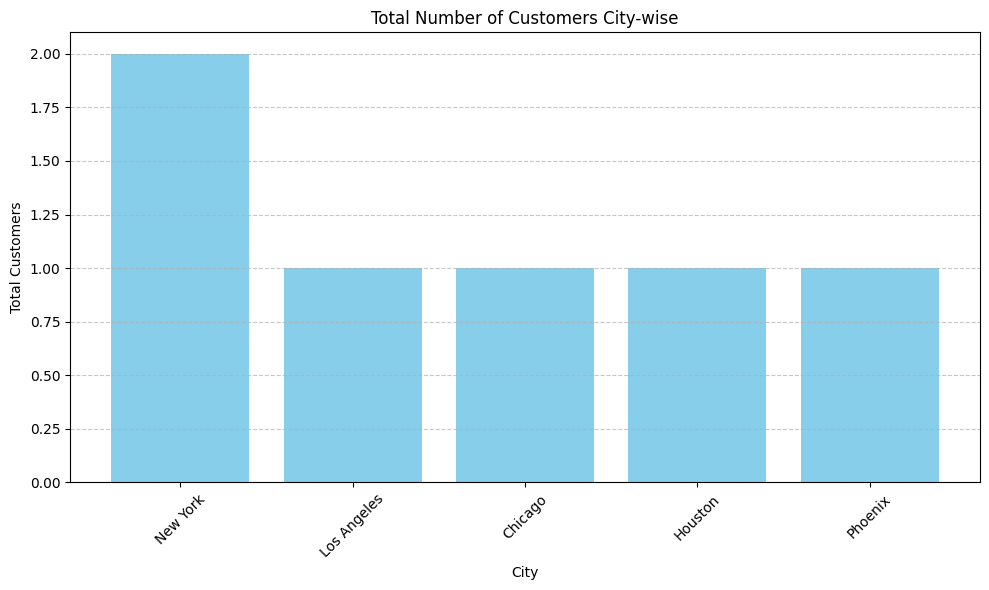

In [9]:
import matplotlib.pyplot as plt

def total_customers_by_city(customer_data):
    city_customer_count = customer_data['city'].value_counts().reset_index()
    city_customer_count.columns = ['City', 'Total Customers']
    print("\nTotal Number of Customers City-wise:")
    print(city_customer_count)
    return city_customer_count

def plot_customers_by_city(city_customer_count):
    plt.figure(figsize=(10, 6))
    plt.bar(city_customer_count['City'], city_customer_count['Total Customers'], color='skyblue')
    plt.title('Total Number of Customers City-wise')
    plt.xlabel('City')
    plt.ylabel('Total Customers')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    db_connection = create_connection()
    if db_connection:
        customer_data, product_data, order_data = fetch_data(db_connection)
        city_customer_count = total_customers_by_city(customer_data)
        plot_customers_by_city(city_customer_count)
        db_connection.close()


Database connection established.

Most Frequent Customers:
  Customer ID  Total Orders
0        C001             1
1        C002             1
2        C003             1
3        C004             1
4        C005             1


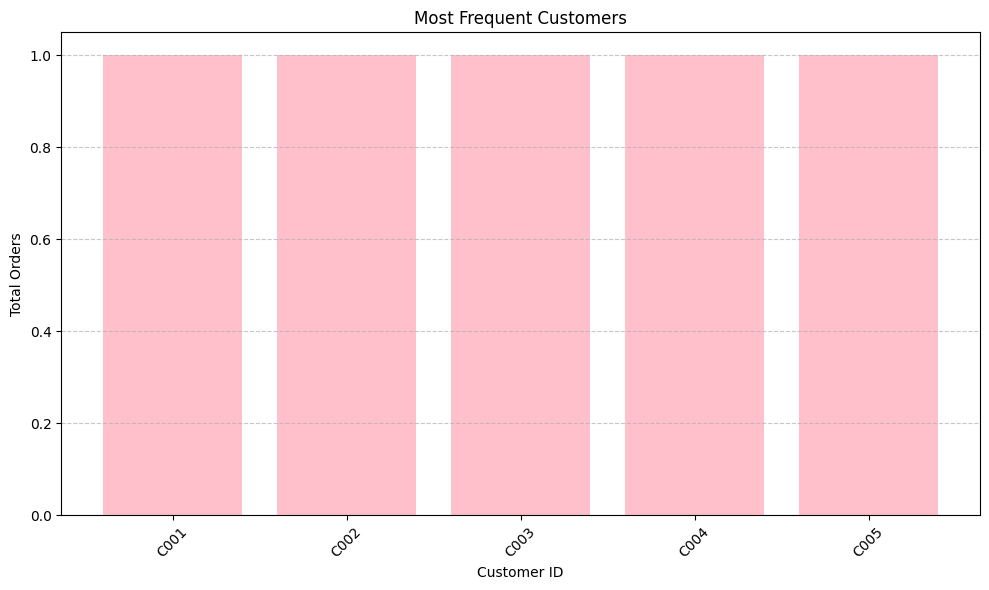

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Count the number of orders for each customer
    frequent_customers = order_data['customer_id'].value_counts().reset_index()
    frequent_customers.columns = ['Customer ID', 'Total Orders']
    frequent_customers = frequent_customers.sort_values(by='Total Orders', ascending=False)

    print("\nMost Frequent Customers:")
    print(frequent_customers)

    # Plotting the most frequent customers
    plt.figure(figsize=(10, 6))
    plt.bar(frequent_customers['Customer ID'][:10], frequent_customers['Total Orders'][:10], color='pink')
    plt.title('Most Frequent Customers')
    plt.xlabel('Customer ID')
    plt.ylabel('Total Orders')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Product Analysis

Database connection established.

Total Number of Products by Category:
          Category  Total Products
0      Electronics             190
1  Home Appliances              50


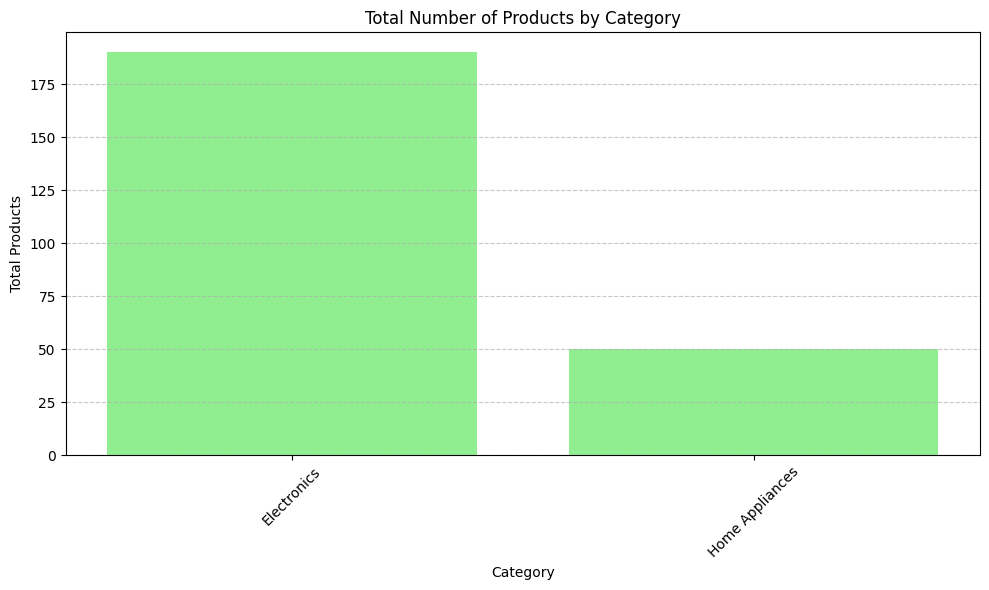

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Group products by category and sum their stock
    category_product_count = product_data.groupby('category')['stock'].sum().reset_index()
    category_product_count.columns = ['Category', 'Total Products']

    print("\nTotal Number of Products by Category:")
    print(category_product_count)

    # Plotting the total number of products by category
    plt.figure(figsize=(10, 6))
    plt.bar(category_product_count['Category'], category_product_count['Total Products'], color='lightgreen')
    plt.title('Total Number of Products by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Products')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Distribution of Products Across Sub-Categories:
  Sub-Category  Total Products
0        Audio              40
1    Computers              50
2      Kitchen              30
3      Laundry              20
4       Mobile             100


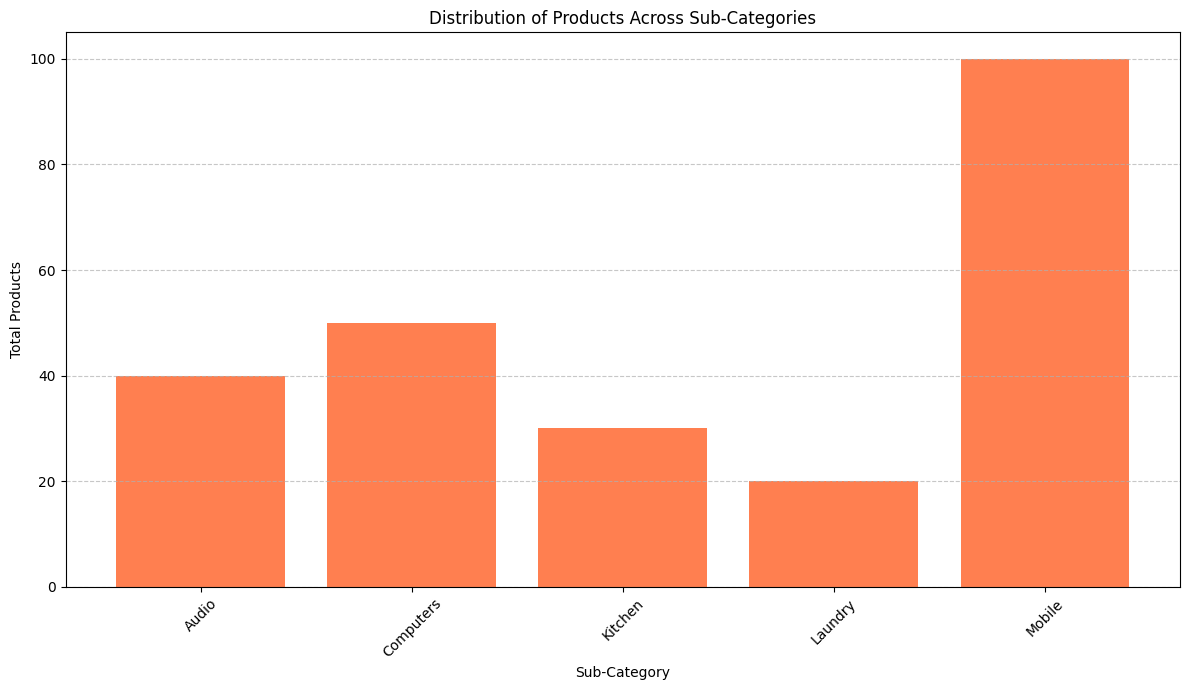

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Group products by sub-category and sum their stock
    subcategory_product_count = product_data.groupby('sub_category')['stock'].sum().reset_index()
    subcategory_product_count.columns = ['Sub-Category', 'Total Products']

    print("\nDistribution of Products Across Sub-Categories:")
    print(subcategory_product_count)

    # Plotting the distribution of products across sub-categories
    plt.figure(figsize=(12, 7))
    plt.bar(subcategory_product_count['Sub-Category'], subcategory_product_count['Total Products'], color='coral')
    plt.title('Distribution of Products Across Sub-Categories')
    plt.xlabel('Sub-Category')
    plt.ylabel('Total Products')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Products with Low Stock Levels:
Empty DataFrame
Columns: [product_id, product_name, category, sub_category, original_price, selling_price, stock]
Index: []


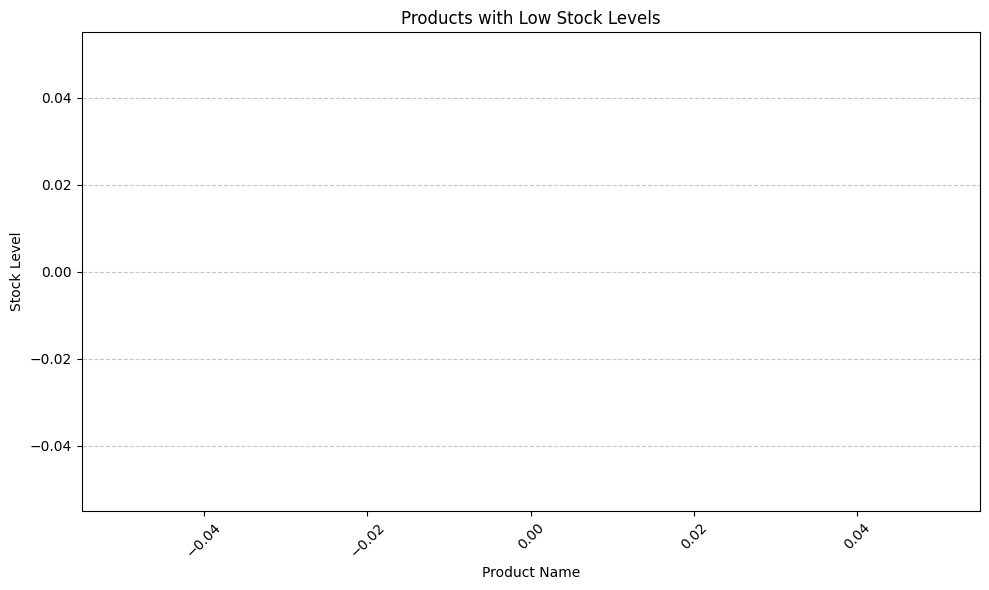

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Define the threshold for low stock (e.g., stock < 10)
    low_stock_threshold = 10

    # Filter products with stock levels below the threshold
    low_stock_products = product_data[product_data['stock'] < low_stock_threshold]

    print("\nProducts with Low Stock Levels:")
    print(low_stock_products)

    # Plotting products with low stock levels
    plt.figure(figsize=(10, 6))
    plt.bar(low_stock_products['product_name'], low_stock_products['stock'], color='red')
    plt.title('Products with Low Stock Levels')
    plt.xlabel('Product Name')
    plt.ylabel('Stock Level')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.
Average Selling Price:  504.0
Maximum Selling Price:  1000.0
Minimum Selling Price:  120.0


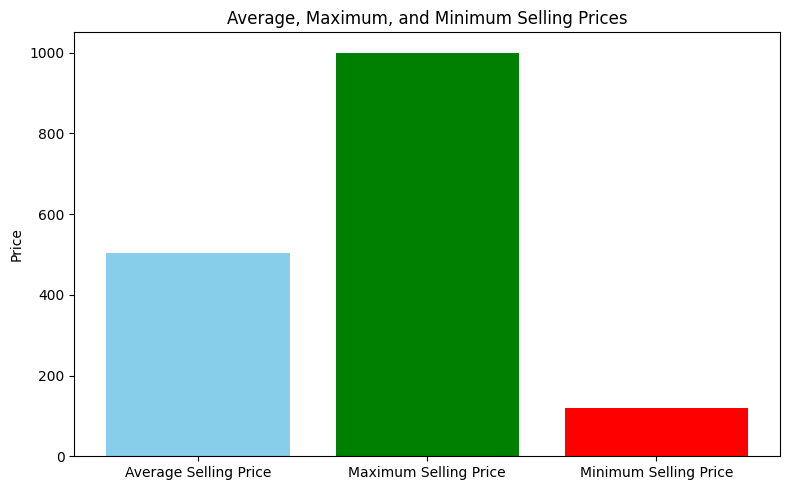

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Calculate average, maximum, and minimum selling prices
    avg_selling_price = product_data['selling_price'].mean()
    max_selling_price = product_data['selling_price'].max()
    min_selling_price = product_data['selling_price'].min()

    print("Average Selling Price: ", avg_selling_price)
    print("Maximum Selling Price: ", max_selling_price)
    print("Minimum Selling Price: ", min_selling_price)

    # Bar plot to visualize average, max, and min selling prices
    prices = [avg_selling_price, max_selling_price, min_selling_price]
    labels = ['Average Selling Price', 'Maximum Selling Price', 'Minimum Selling Price']

    plt.figure(figsize=(8, 5))
    plt.bar(labels, prices, color=['skyblue', 'green', 'red'])
    plt.title('Average, Maximum, and Minimum Selling Prices')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Order Analysis

Database connection established.

Top 10 Products by Order Quantity:
           product_name  Total Quantity Ordered
3  Bluetooth Headphones                     3.0
1            Smartphone                     2.0
0                Laptop                     1.0
2          Coffee Maker                     1.0
4       Washing Machine                     1.0


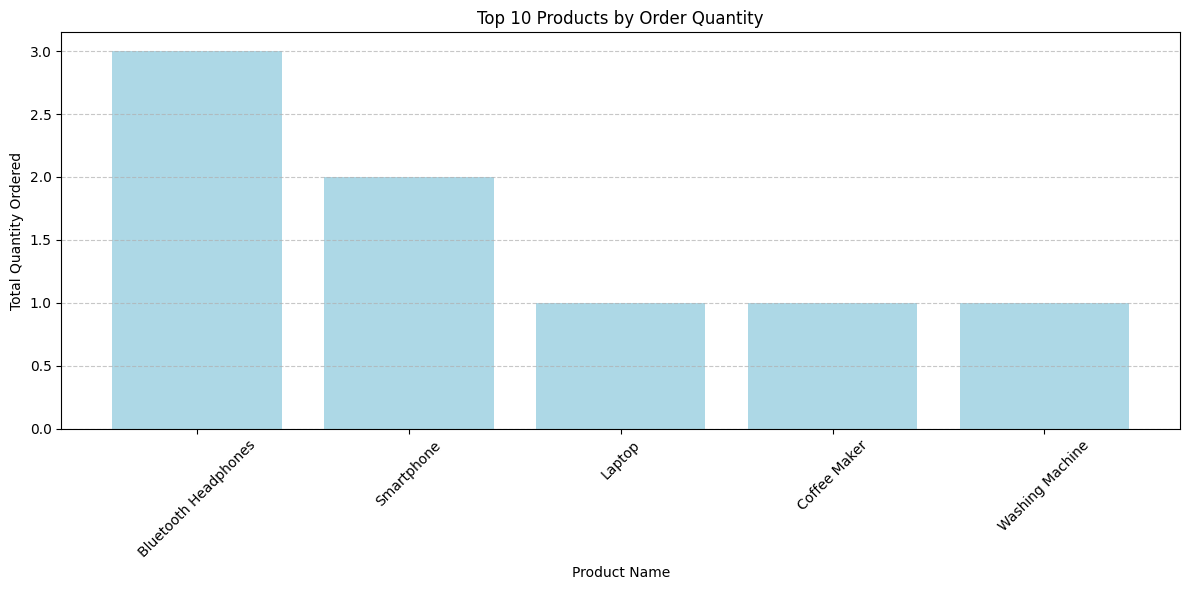

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Group by product_id and sum the quantity to get the total ordered quantity for each product
    product_order_totals = order_data.groupby('product_id')['quantity'].sum().reset_index()
    product_order_totals.columns = ['Product ID', 'Total Quantity Ordered']

    # Merge with product data to get product names
    product_order_totals = product_order_totals.merge(product_data[['product_id', 'product_name']], 
                                                      left_on='Product ID', 
                                                      right_on='product_id', 
                                                      how='left')

    # Sort by total quantity ordered to get the top 10 products
    top_10_products = product_order_totals.sort_values(by='Total Quantity Ordered', ascending=False).head(10)

    print("\nTop 10 Products by Order Quantity:")
    print(top_10_products[['product_name', 'Total Quantity Ordered']])

    # Plotting the top 10 products by order quantity
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_products['product_name'], top_10_products['Total Quantity Ordered'], color='lightblue')
    plt.title('Top 10 Products by Order Quantity')
    plt.xlabel('Product Name')
    plt.ylabel('Total Quantity Ordered')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Order Status Distribution:
  Order Status  Number of Orders
0      Shipped                 2
1   Processing                 1
2    Delivered                 1
3      Pending                 1


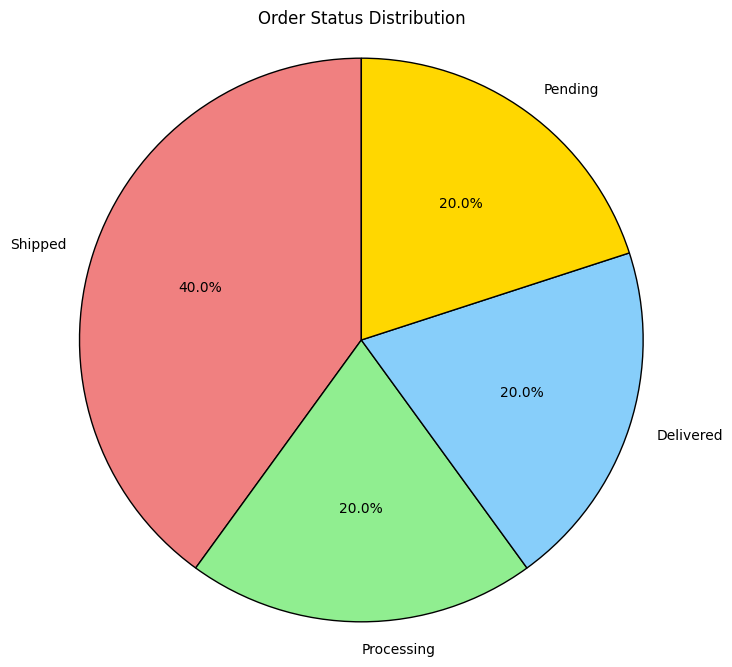

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Group by 'order_status' and count the number of occurrences for each status
    order_status_distribution = order_data['order_status'].value_counts().reset_index()
    order_status_distribution.columns = ['Order Status', 'Number of Orders']

    print("\nOrder Status Distribution:")
    print(order_status_distribution)

    # Plotting the order status distribution using a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(order_status_distribution['Number of Orders'], 
            labels=order_status_distribution['Order Status'], 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=['lightcoral', 'lightgreen', 'lightskyblue', 'gold'],
            wedgeprops={'edgecolor': 'black'})

    plt.title('Order Status Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Most Popular Products Based on Order Quantity:
           product_name  Total Quantity Ordered
3  Bluetooth Headphones                     3.0
1            Smartphone                     2.0
0                Laptop                     1.0
2          Coffee Maker                     1.0
4       Washing Machine                     1.0


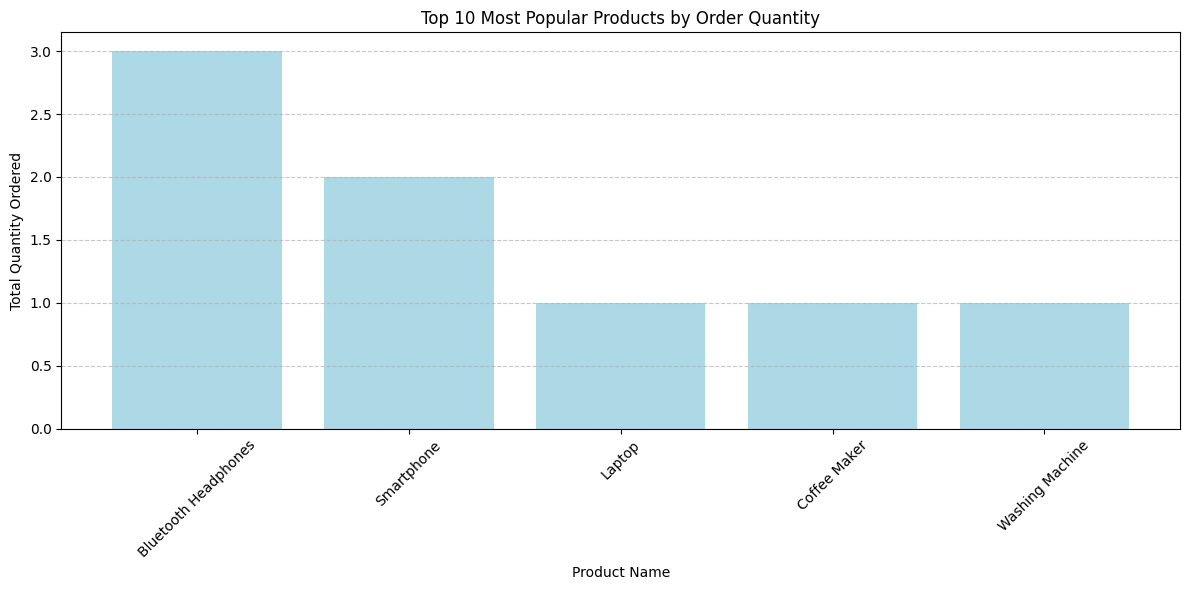

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Group by product_id and sum the quantity to get the total ordered quantity for each product
    product_popularity = order_data.groupby('product_id')['quantity'].sum().reset_index()
    product_popularity.columns = ['Product ID', 'Total Quantity Ordered']

    # Merge with product data to get product names
    product_popularity = product_popularity.merge(product_data[['product_id', 'product_name']], 
                                                  left_on='Product ID', 
                                                  right_on='product_id', 
                                                  how='left')

    # Sort the products by total quantity ordered in descending order
    most_popular_products = product_popularity.sort_values(by='Total Quantity Ordered', ascending=False)

    # Display the top 10 most popular products
    print("\nMost Popular Products Based on Order Quantity:")
    print(most_popular_products[['product_name', 'Total Quantity Ordered']].head(10))

    # Plotting the most popular products
    plt.figure(figsize=(12, 6))
    plt.bar(most_popular_products['product_name'].head(10), 
            most_popular_products['Total Quantity Ordered'].head(10), 
            color='lightblue')
    plt.title('Top 10 Most Popular Products by Order Quantity')
    plt.xlabel('Product Name')
    plt.ylabel('Total Quantity Ordered')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Sales Analysis

Database connection established.

Products by Total Revenue Generated:
           product_name  Total Revenue
1            Smartphone         1400.0
0                Laptop         1000.0
4       Washing Machine          550.0
3  Bluetooth Headphones          450.0
2          Coffee Maker          120.0


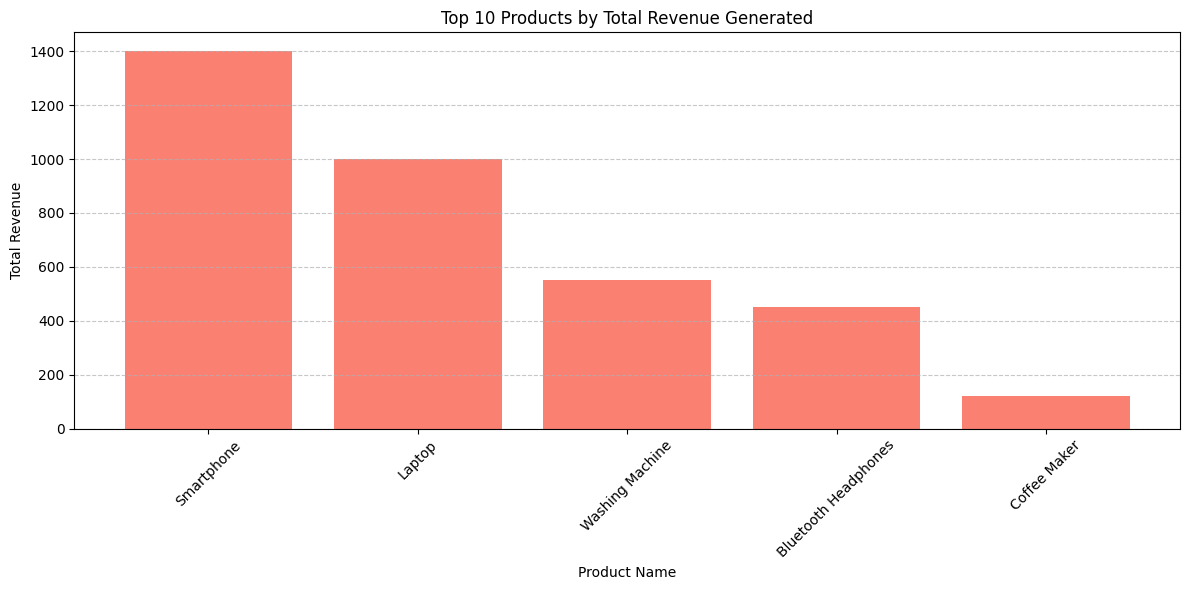

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Merge order_data with product_data to include selling prices in the order data
    order_data_merged = order_data.merge(product_data[['product_id', 'selling_price']],
                                         left_on='product_id', 
                                         right_on='product_id',
                                         how='left')

    # Calculate revenue for each order (quantity * selling price)
    order_data_merged['revenue'] = order_data_merged['quantity'] * order_data_merged['selling_price']

    # Group by product_id and sum the revenue to get the total revenue per product
    product_revenue = order_data_merged.groupby('product_id')['revenue'].sum().reset_index()
    product_revenue.columns = ['Product ID', 'Total Revenue']

    # Merge with product_data to get product names
    product_revenue = product_revenue.merge(product_data[['product_id', 'product_name']], 
                                            left_on='Product ID', 
                                            right_on='product_id', 
                                            how='left')

    # Sort the products by total revenue in descending order
    top_revenue_products = product_revenue.sort_values(by='Total Revenue', ascending=False)

    # Display the products with the highest revenue
    print("\nProducts by Total Revenue Generated:")
    print(top_revenue_products[['product_name', 'Total Revenue']])

    # Plotting the products by total revenue
    plt.figure(figsize=(12, 6))
    plt.bar(top_revenue_products['product_name'].head(10), 
            top_revenue_products['Total Revenue'].head(10), 
            color='salmon')
    plt.title('Top 10 Products by Total Revenue Generated')
    plt.xlabel('Product Name')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Total Revenue Percentage by Product Category:
          Category  Revenue Percentage
0      Electronics           80.965909
1  Home Appliances           19.034091


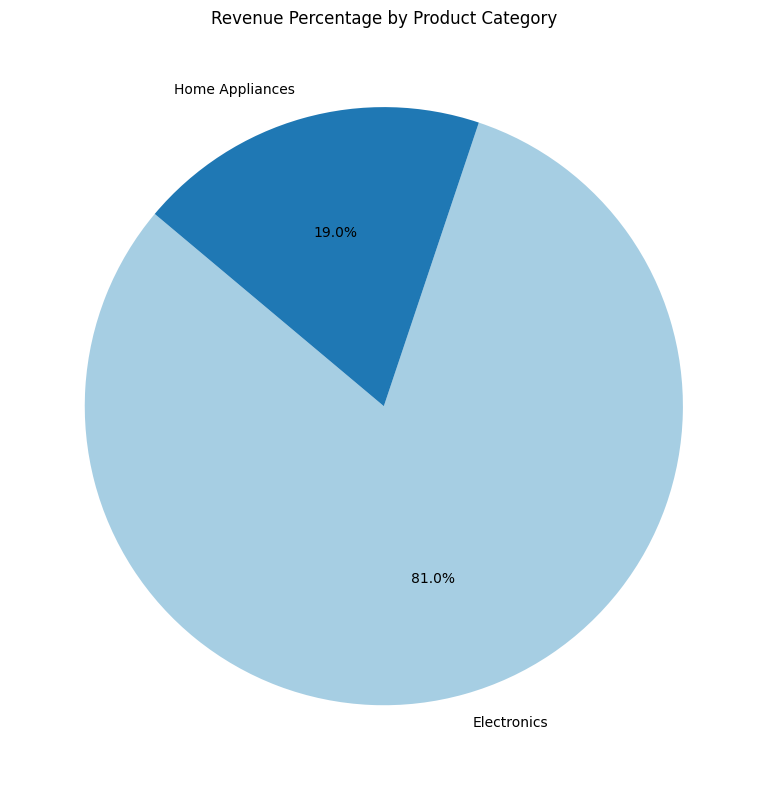

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Merge order_data with product_data to include category and selling price
    order_data_merged = order_data.merge(product_data[['product_id', 'category', 'selling_price']],
                                         left_on='product_id', 
                                         right_on='product_id',
                                         how='left')

    # Calculate revenue for each order (quantity * selling price)
    order_data_merged['revenue'] = order_data_merged['quantity'] * order_data_merged['selling_price']

    # Group by category and sum the revenue to get the total revenue per category
    category_revenue = order_data_merged.groupby('category')['revenue'].sum().reset_index()
    category_revenue.columns = ['Category', 'Total Revenue']

    # Calculate the total revenue across all categories
    total_revenue = category_revenue['Total Revenue'].sum()

    # Calculate the percentage of revenue for each category
    category_revenue['Revenue Percentage'] = (category_revenue['Total Revenue'] / total_revenue) * 100

    # Display the category-wise revenue percentage
    print("\nTotal Revenue Percentage by Product Category:")
    print(category_revenue[['Category', 'Revenue Percentage']])

    # Plotting the category-wise revenue percentage as a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(category_revenue['Revenue Percentage'], 
            labels=category_revenue['Category'], 
            autopct='%1.1f%%', 
            colors=plt.cm.Paired.colors,
            startangle=140)
    plt.title('Revenue Percentage by Product Category')
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Total Revenue Generated from All Orders: ₹3,520.00


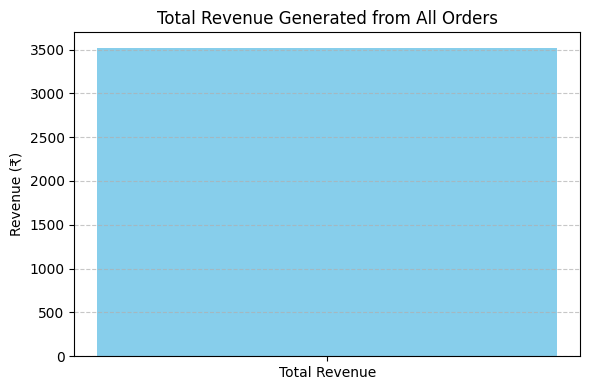

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Merge order_data with product_data to include selling prices
    order_data_merged = order_data.merge(product_data[['product_id', 'selling_price']],
                                         left_on='product_id', 
                                         right_on='product_id',
                                         how='left')

    # Calculate revenue for each order (quantity * selling price)
    order_data_merged['revenue'] = order_data_merged['quantity'] * order_data_merged['selling_price']

    # Calculate the total revenue generated from all orders
    total_revenue = order_data_merged['revenue'].sum()

    # Display the total revenue
    print(f"\nTotal Revenue Generated from All Orders: ₹{total_revenue:,.2f}")

    # Plotting the total revenue as a bar chart
    plt.figure(figsize=(6, 4))
    plt.bar(['Total Revenue'], [total_revenue], color='skyblue')
    plt.title('Total Revenue Generated from All Orders')
    plt.ylabel('Revenue (₹)')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Top 10 Most Profitable Products:
  product_id          product_name  profit
0       P001                Laptop   200.0
1       P002            Smartphone   100.0
3       P004  Bluetooth Headphones    50.0
4       P005       Washing Machine    50.0
2       P003          Coffee Maker    30.0


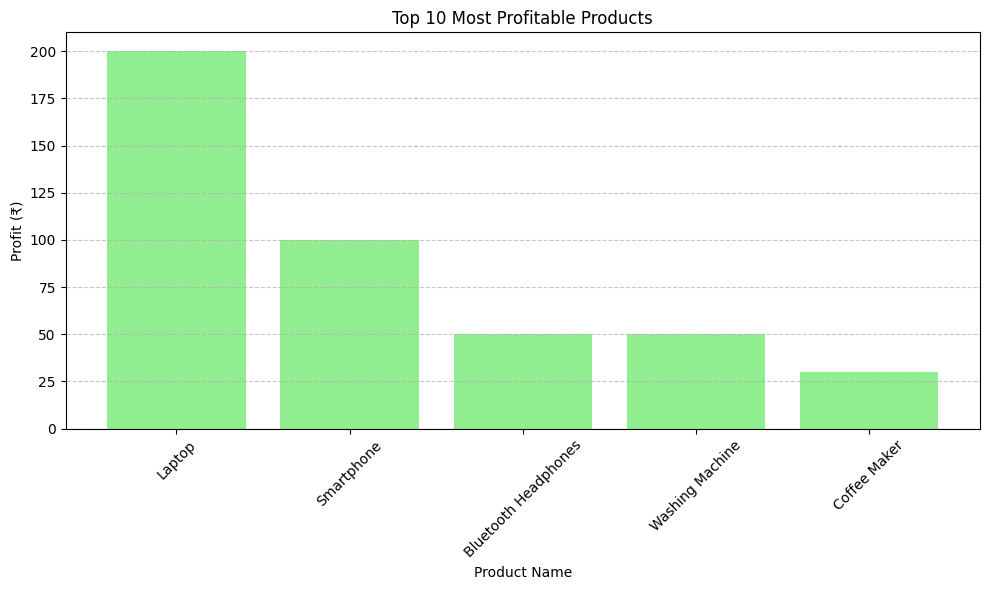

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Calculate profit for each product
    product_data['profit'] = product_data['original_price'] - product_data['selling_price']

    # Sort products by profit in descending order
    most_profitable_products = product_data.sort_values(by='profit', ascending=False)

    # Display the top 10 most profitable products
    print("\nTop 10 Most Profitable Products:")
    print(most_profitable_products[['product_id', 'product_name', 'profit']].head(10))

    # Plotting the most profitable products
    plt.figure(figsize=(10, 6))
    plt.bar(most_profitable_products['product_name'].head(10), 
            most_profitable_products['profit'].head(10), 
            color='lightgreen')
    
    plt.title('Top 10 Most Profitable Products')
    plt.xlabel('Product Name')
    plt.ylabel('Profit (₹)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Customer Order Pattern

Database connection established.

Product with the Highest Order Quantity: Bluetooth Headphones - 3.0 units
Product with the Lowest Order Quantity: Coffee Maker - 1.0 units


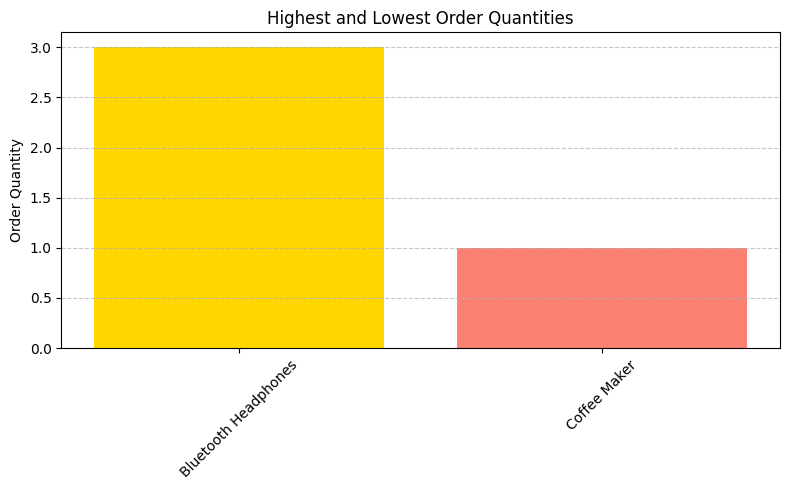

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Merge order_data with product_data
    order_data_merged = order_data.merge(product_data[['product_id', 'product_name']],
                                         left_on='product_id', 
                                         right_on='product_id',
                                         how='left')

    # Group by product name and sum the order quantities
    product_order_quantity = order_data_merged.groupby('product_name')['quantity'].sum().reset_index()

    # Identify the product with the highest and lowest order quantities
    highest_order_product = product_order_quantity.loc[product_order_quantity['quantity'].idxmax()]
    lowest_order_product = product_order_quantity.loc[product_order_quantity['quantity'].idxmin()]

    # Display the results
    print(f"\nProduct with the Highest Order Quantity: {highest_order_product['product_name']} - {highest_order_product['quantity']} units")
    print(f"Product with the Lowest Order Quantity: {lowest_order_product['product_name']} - {lowest_order_product['quantity']} units")

    # Optional: Plotting the order quantities of the top and bottom products
    plt.figure(figsize=(8, 5))
    plt.bar([highest_order_product['product_name'], lowest_order_product['product_name']], 
            [highest_order_product['quantity'], lowest_order_product['quantity']], 
            color=['gold', 'salmon'])
    
    plt.title('Highest and Lowest Order Quantities')
    plt.ylabel('Order Quantity')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Customer with the Highest Order Quantity: Daisy Miller - 3.0 units
Customer with the Lowest Order Quantity: Alice Johnson - 1.0 units


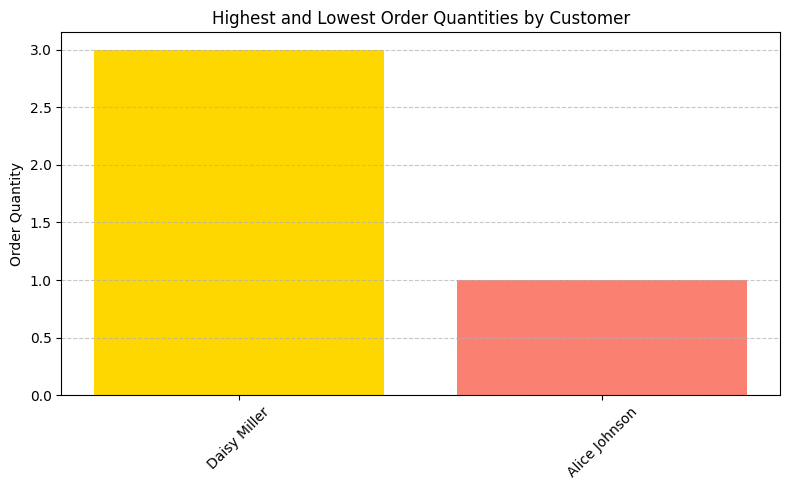

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Merge order_data with customer_data
    order_data_merged = order_data.merge(customer_data[['customer_id', 'name']],
                                         left_on='customer_id', 
                                         right_on='customer_id',
                                         how='left')

    # Group by customer name and sum the order quantities
    customer_order_quantity = order_data_merged.groupby('name')['quantity'].sum().reset_index()

    # Identify the customer with the highest and lowest order quantities
    highest_order_customer = customer_order_quantity.loc[customer_order_quantity['quantity'].idxmax()]
    lowest_order_customer = customer_order_quantity.loc[customer_order_quantity['quantity'].idxmin()]

    # Display the results
    print(f"\nCustomer with the Highest Order Quantity: {highest_order_customer['name']} - {highest_order_customer['quantity']} units")
    print(f"Customer with the Lowest Order Quantity: {lowest_order_customer['name']} - {lowest_order_customer['quantity']} units")

    # Optional: Plotting the order quantities of the top and bottom customers
    plt.figure(figsize=(8, 5))
    plt.bar([highest_order_customer['name'], lowest_order_customer['name']], 
            [highest_order_customer['quantity'], lowest_order_customer['quantity']], 
            color=['gold', 'salmon'])
    
    plt.title('Highest and Lowest Order Quantities by Customer')
    plt.ylabel('Order Quantity')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Payment Mode Preferences:
  Payment Mode  Count
0  Credit Card      2
1       PayPal      1
2   Debit Card      1
3         Cash      1


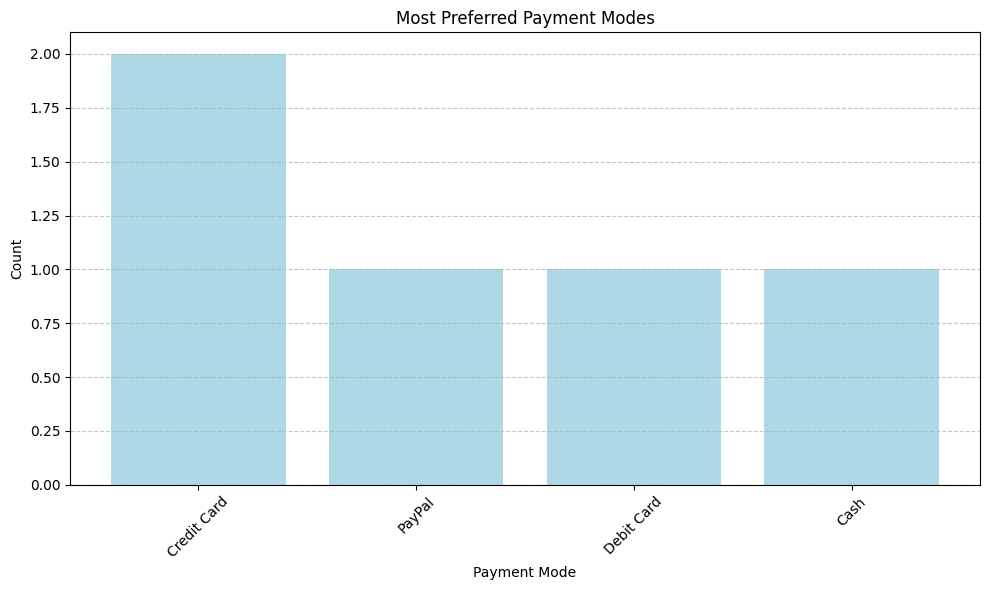

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Count occurrences of each payment mode
    payment_mode_count = order_data['payment_mode'].value_counts().reset_index()
    payment_mode_count.columns = ['Payment Mode', 'Count']

    # Display the count of each payment mode
    print("\nPayment Mode Preferences:")
    print(payment_mode_count)

    # Plotting the distribution of payment modes
    plt.figure(figsize=(10, 6))
    plt.bar(payment_mode_count['Payment Mode'], payment_mode_count['Count'], color='lightblue')
    plt.title('Most Preferred Payment Modes')
    plt.xlabel('Payment Mode')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Time Based Analysis

Database connection established.

Month-wise Total Sales:
  YearMonth  total_price
0   2024-10       3520.0


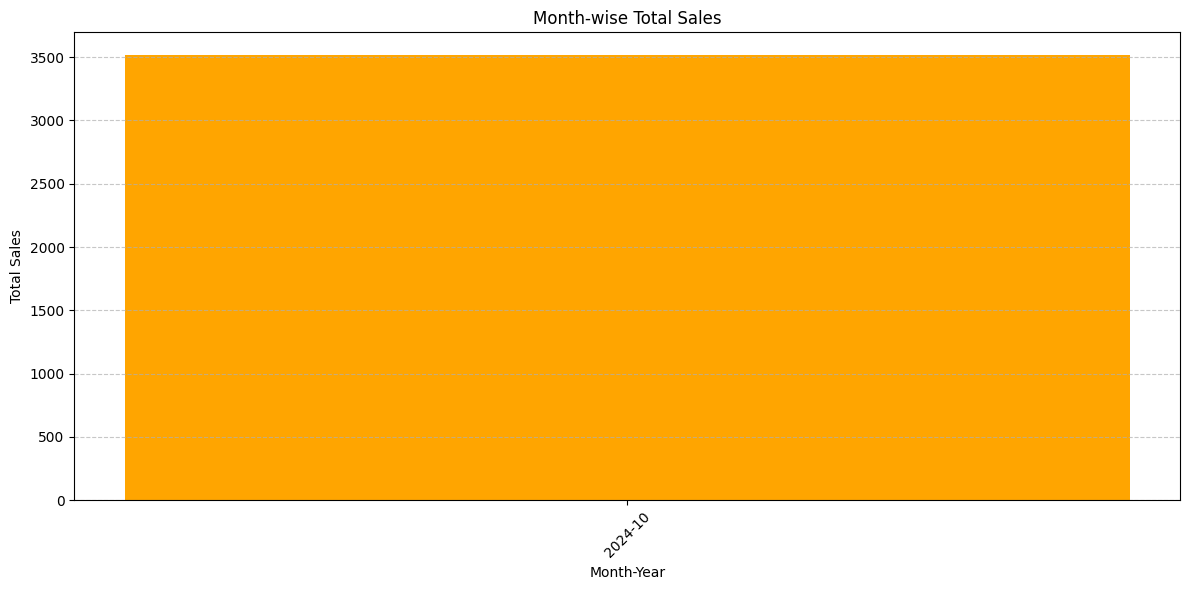

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Convert order_date to datetime format
    order_data['order_date'] = pd.to_datetime(order_data['order_date'])

    # Extract month and year from the order_date
    order_data['YearMonth'] = order_data['order_date'].dt.to_period('M')

    # Calculate total sales per month
    monthly_sales = order_data.groupby('YearMonth')['total_price'].sum().reset_index()
    monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)  # Convert to string for plotting

    # Display the month-wise total sales
    print("\nMonth-wise Total Sales:")
    print(monthly_sales)

    # Plotting the month-wise total sales as a bar graph
    plt.figure(figsize=(12, 6))
    plt.bar(monthly_sales['YearMonth'], monthly_sales['total_price'], color='orange')
    plt.title('Month-wise Total Sales')
    plt.xlabel('Month-Year')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Month-Year Wise Total Sales:
  YearMonth  total_price
0   2024-10       3520.0


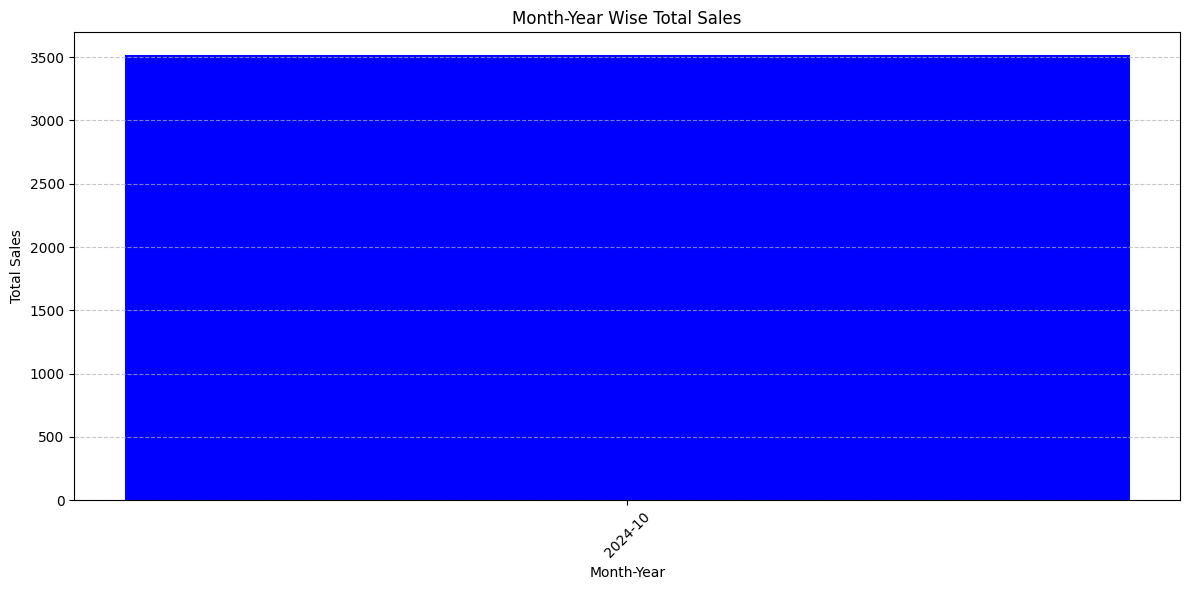

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Convert order_date to datetime format
    order_data['order_date'] = pd.to_datetime(order_data['order_date'])

    # Extract year and month from the order_date
    order_data['YearMonth'] = order_data['order_date'].dt.to_period('M')

    # Calculate total sales per month-year
    monthly_sales = order_data.groupby('YearMonth')['total_price'].sum().reset_index()
    monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)  # Convert to string for plotting

    # Display the month-year wise total sales
    print("\nMonth-Year Wise Total Sales:")
    print(monthly_sales)

    # Plotting the month-year wise total sales as a bar graph
    plt.figure(figsize=(12, 6))
    plt.bar(monthly_sales['YearMonth'], monthly_sales['total_price'], color='blue')
    plt.title('Month-Year Wise Total Sales')
    plt.xlabel('Month-Year')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Peak Order Date:
Date: 2024-10-01, Orders: 1


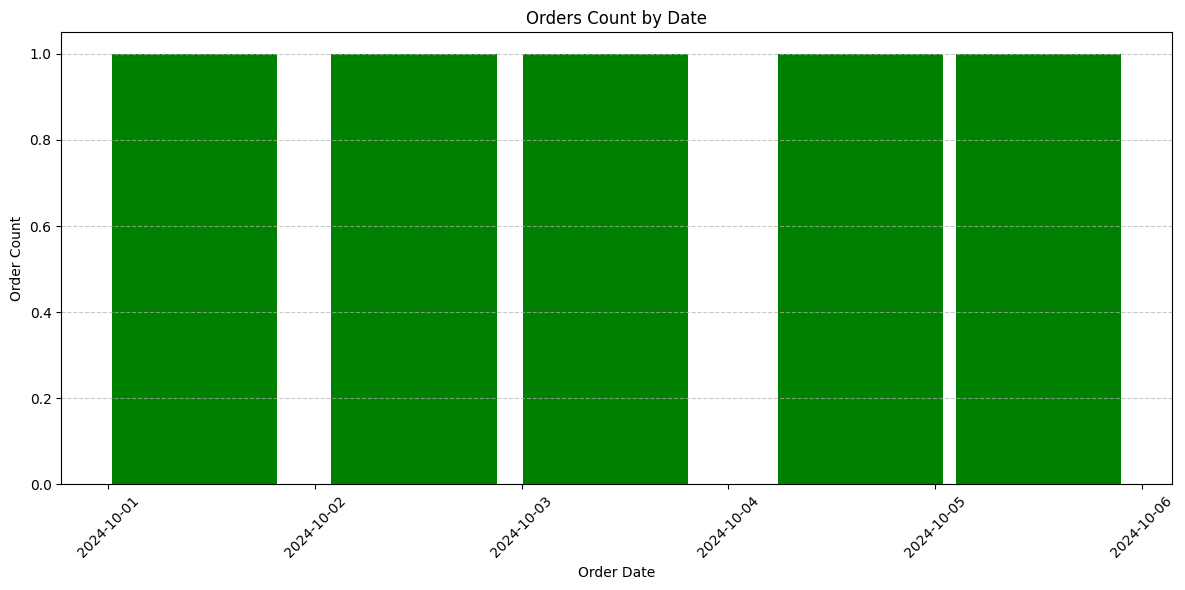

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Convert order_date to datetime format
    order_data['order_date'] = pd.to_datetime(order_data['order_date'])

    # Count orders per date
    peak_order_date = order_data['order_date'].value_counts().reset_index()
    peak_order_date.columns = ['Order Date', 'Order Count']

    # Identify the peak order date
    max_order_date = peak_order_date.loc[peak_order_date['Order Count'].idxmax()]

    # Display the peak order date
    print("\nPeak Order Date:")
    print(f"Date: {max_order_date['Order Date'].date()}, Orders: {max_order_date['Order Count']}")

    # Optionally, plot the order counts by date for better visualization
    plt.figure(figsize=(12, 6))
    plt.bar(peak_order_date['Order Date'], peak_order_date['Order Count'], color='green')
    plt.title('Orders Count by Date')
    plt.xlabel('Order Date')
    plt.ylabel('Order Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Geographical Analysis

Database connection established.

Customer Distribution by City:
          City  Total Customers
0     New York                2
1  Los Angeles                1
2      Chicago                1
3      Houston                1
4      Phoenix                1


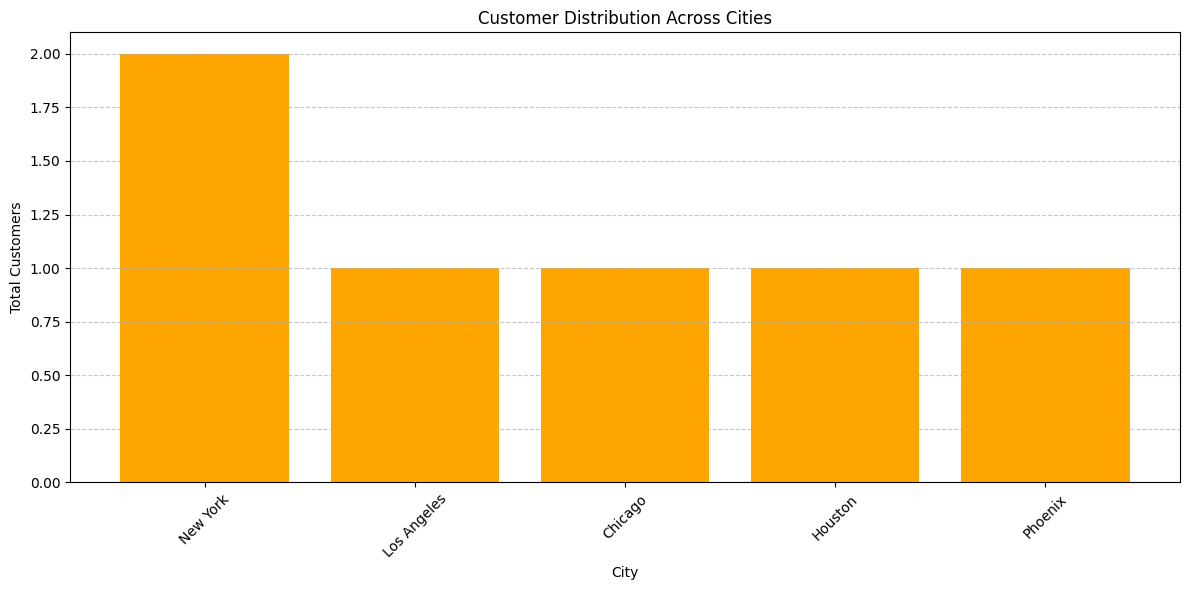

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Count customers per city
    city_distribution = customer_data['city'].value_counts().reset_index()
    city_distribution.columns = ['City', 'Total Customers']

    # Display the city distribution
    print("\nCustomer Distribution by City:")
    print(city_distribution)

    # Plotting the distribution of customers across cities
    plt.figure(figsize=(12, 6))
    plt.bar(city_distribution['City'], city_distribution['Total Customers'], color='orange')
    plt.title('Customer Distribution Across Cities')
    plt.xlabel('City')
    plt.ylabel('Total Customers')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Product Popularity by City:
          city          product_name  Order Count
0      Chicago          Coffee Maker            1
1      Houston  Bluetooth Headphones            1
2  Los Angeles            Smartphone            1
3     New York                Laptop            1
4      Phoenix       Washing Machine            1

Category Popularity by City:
          city         category  Order Count
0      Chicago  Home Appliances            1
1      Houston      Electronics            1
2  Los Angeles      Electronics            1
3     New York      Electronics            1
4      Phoenix  Home Appliances            1


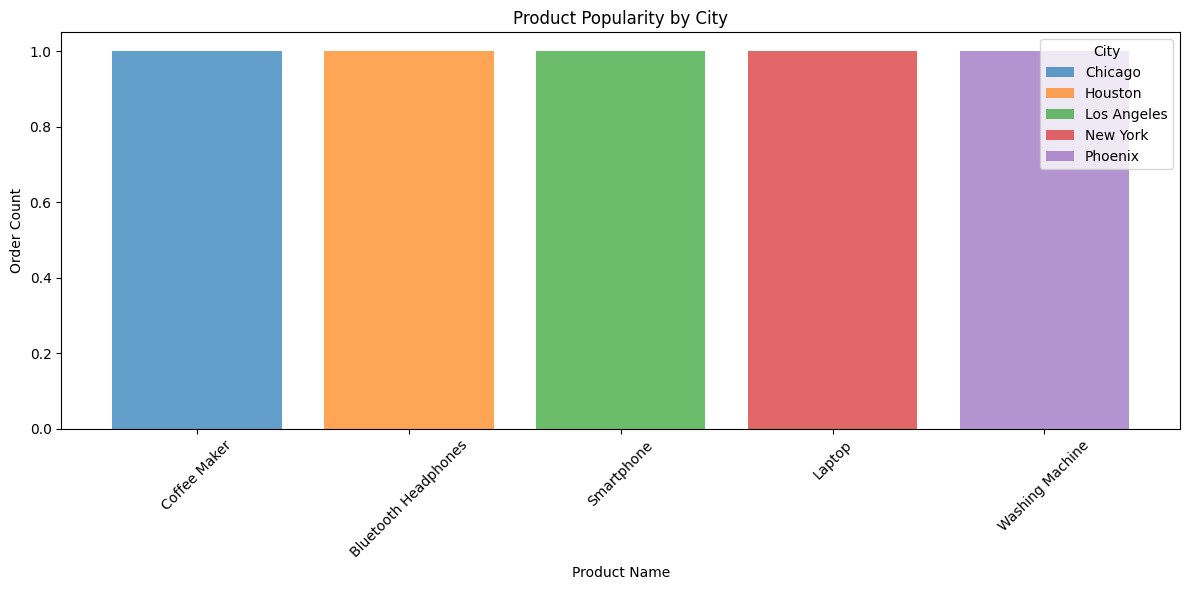

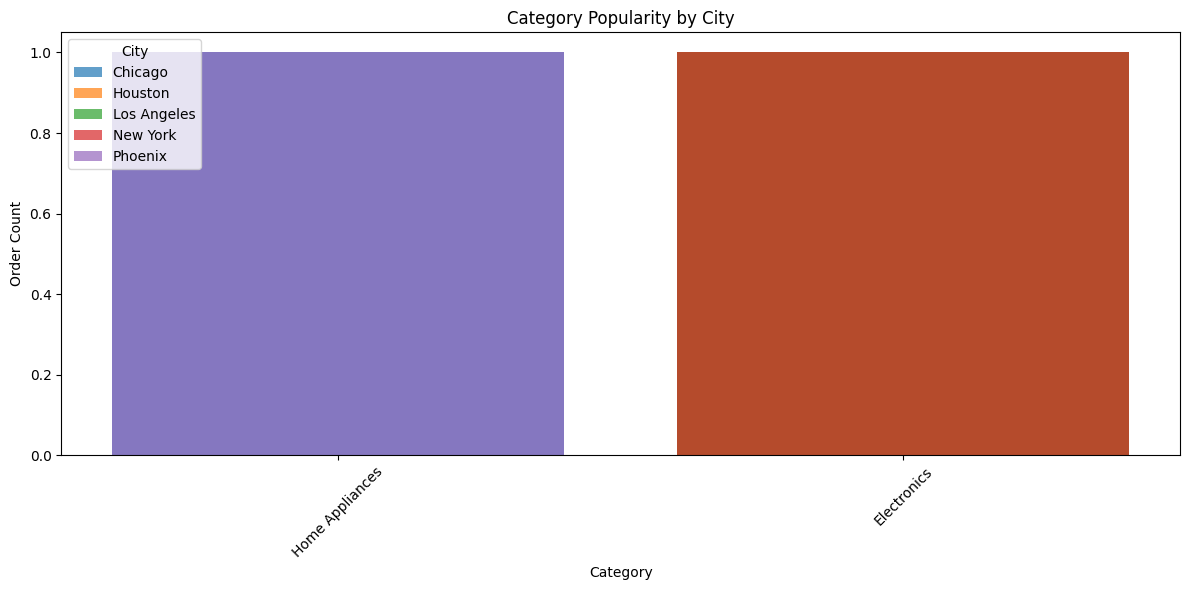

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Merge dataframes
    merged_data = order_data.merge(customer_data, on='customer_id').merge(product_data, on='product_id')

    # Group by city and product
    city_product_count = merged_data.groupby(['city', 'product_name']).size().reset_index(name='Order Count')
    city_category_count = merged_data.groupby(['city', 'category']).size().reset_index(name='Order Count')

    # Display product popularity by city
    print("\nProduct Popularity by City:")
    print(city_product_count)

    # Display category popularity by city
    print("\nCategory Popularity by City:")
    print(city_category_count)

    # Plotting Product Popularity by City
    plt.figure(figsize=(12, 6))
    for city in city_product_count['city'].unique():
        subset = city_product_count[city_product_count['city'] == city]
        plt.bar(subset['product_name'], subset['Order Count'], label=city, alpha=0.7)

    plt.title('Product Popularity by City')
    plt.xlabel('Product Name')
    plt.ylabel('Order Count')
    plt.xticks(rotation=45)
    plt.legend(title='City')
    plt.tight_layout()
    plt.show()

    # Plotting Category Popularity by City
    plt.figure(figsize=(12, 6))
    for city in city_category_count['city'].unique():
        subset = city_category_count[city_category_count['city'] == city]
        plt.bar(subset['category'], subset['Order Count'], label=city, alpha=0.7)

    plt.title('Category Popularity by City')
    plt.xlabel('Category')
    plt.ylabel('Order Count')
    plt.xticks(rotation=45)
    plt.legend(title='City')
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Product performnce

Database connection established.

Best-Selling Products:
           product_name  quantity
0  Bluetooth Headphones       3.0
3            Smartphone       2.0
1          Coffee Maker       1.0
2                Laptop       1.0
4       Washing Machine       1.0


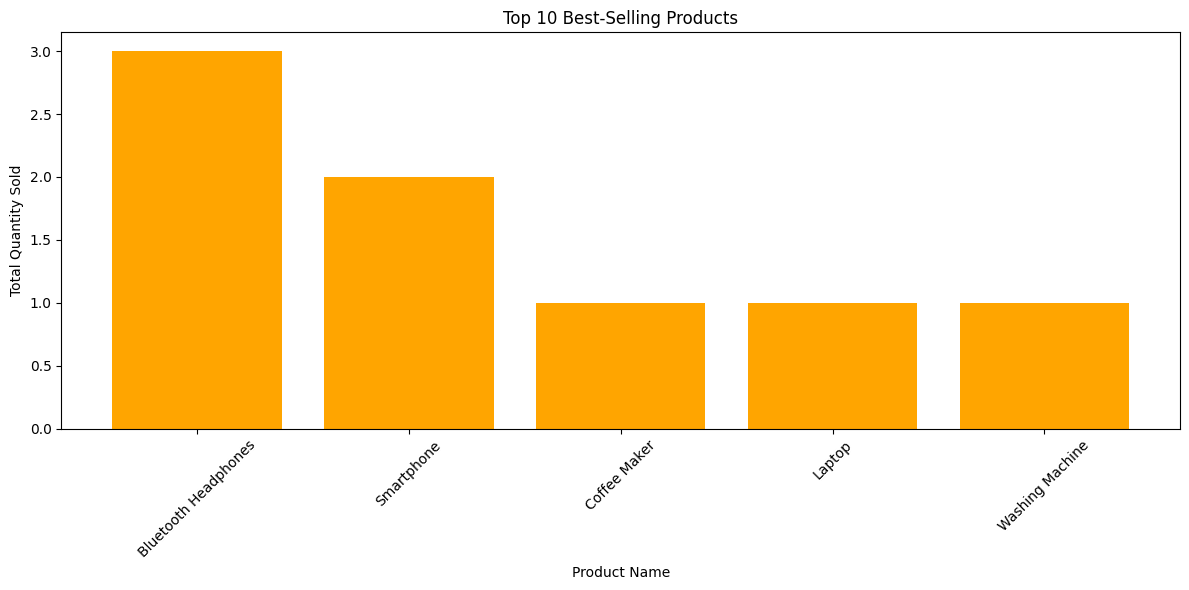

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Merge dataframes
    merged_data = order_data.merge(customer_data, on='customer_id').merge(product_data, on='product_id')

    # Group by product and sum the quantities sold
    best_selling_products = merged_data.groupby('product_name')['quantity'].sum().reset_index()
    best_selling_products = best_selling_products.sort_values(by='quantity', ascending=False)

    # Display the best-selling products
    print("\nBest-Selling Products:")
    print(best_selling_products)

    # Plotting the best-selling products
    plt.figure(figsize=(12, 6))
    plt.bar(best_selling_products['product_name'][:10], best_selling_products['quantity'][:10], color='orange')
    plt.title('Top 10 Best-Selling Products')
    plt.xlabel('Product Name')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()


Database connection established.

Top 10 Slow-Moving Products:
           product_name  quantity
1          Coffee Maker       1.0
2                Laptop       1.0
4       Washing Machine       1.0
3            Smartphone       2.0
0  Bluetooth Headphones       3.0


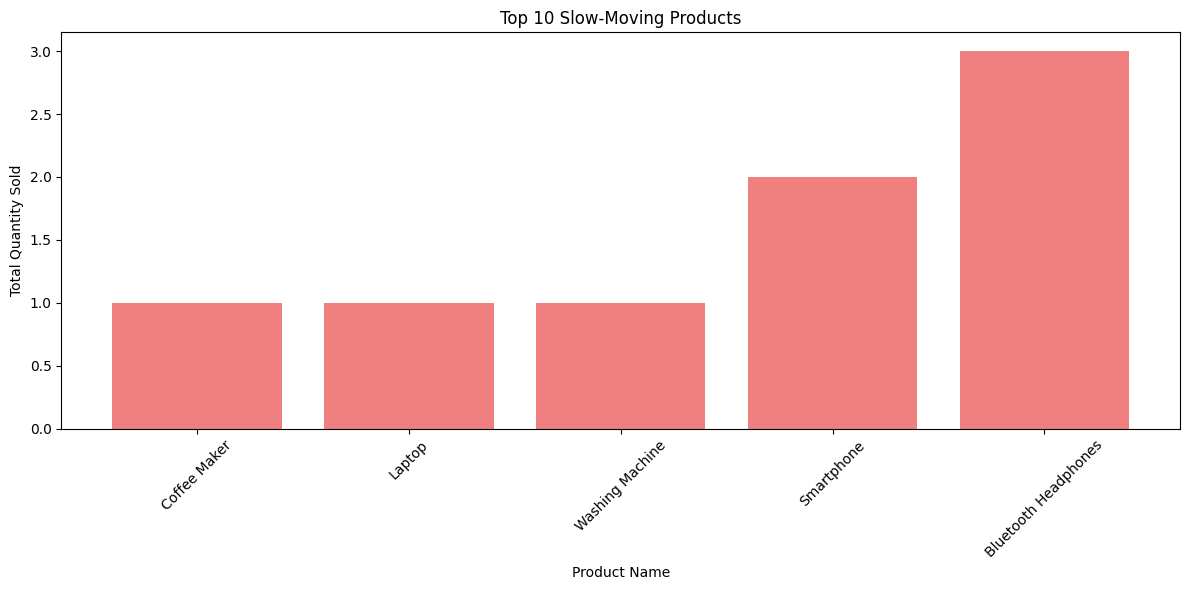

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection
db_connection = create_connection()
if db_connection:
    customer_data, product_data, order_data = fetch_data(db_connection)

    # Merge dataframes
    merged_data = order_data.merge(customer_data, on='customer_id').merge(product_data, on='product_id')

    # Group by product and sum the quantities sold
    slow_moving_products = merged_data.groupby('product_name')['quantity'].sum().reset_index()
    slow_moving_products = slow_moving_products.sort_values(by='quantity', ascending=True)

    # Get the top 10 slow-moving products
    top_10_slow_moving_products = slow_moving_products.head(10)

    # Display the slow-moving products
    print("\nTop 10 Slow-Moving Products:")
    print(top_10_slow_moving_products)

    # Plotting the slow-moving products
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_slow_moving_products['product_name'], top_10_slow_moving_products['quantity'], color='lightcoral')
    plt.title('Top 10 Slow-Moving Products')
    plt.xlabel('Product Name')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Close the database connection
    db_connection.close()
